In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import sys
import importlib

In [2]:
from Data.Data import SVHN
importlib.reload(sys.modules['Data.Data']) 
from Data.Data import SVHN

In [3]:
# instantiate train and test datasets
svhn_train_obj = SVHN('train')
svhn_test_obj = SVHN('test')

# load data
data_dict = svhn_train_obj.load()
data_dict_test = svhn_test_obj.load()

In [4]:
# set sample size
sample_size = 500
test_sample_size = 500

# create clean dataset
svhn_sampled = data_dict['svhn_img'][:sample_size]
svhn_test_sampled = data_dict_test['svhn_img'][:test_sample_size]


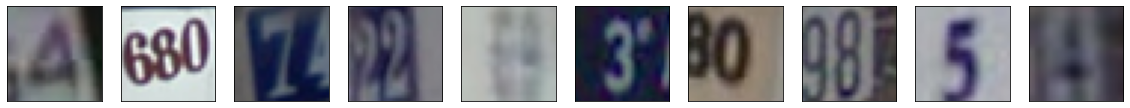

In [5]:
# show 10 images
SVHN.display(svhn_sampled)

*Get baseline score using  Convolutional Neural Network.*

In [11]:
# for testing only - reinstantiate python modules
from Model.model import CNN
importlib.reload(sys.modules['Model.model']) 
from Model.model import CNN

# get baseline score
X = [item['image'] for item in svhn_sampled]
y = [item['label'] for item in svhn_sampled]

X_test = [item['image'] for item in svhn_test_sampled]
y_test = [item['label'] for item in svhn_test_sampled]

cnn = CNN(X, X_test, y, y_test)

history, score, predictions = cnn.model(X, X_test, y, y_test)

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 16)        448       
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 32)          4640      
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 latent_vector (Dense)       (None, 64)                131136    
                                                                 
Total params: 136,224
Trainable params: 136,224
Non-trainable params: 0
_________________________________________________________________
Model: "decoder"
____________________________________

In [24]:
# # summarize history for loss
# plt.plot( history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['Train', 'Validation'], loc='upper right')
# plt.show()

In [13]:
# score
score

0.6444872617721558

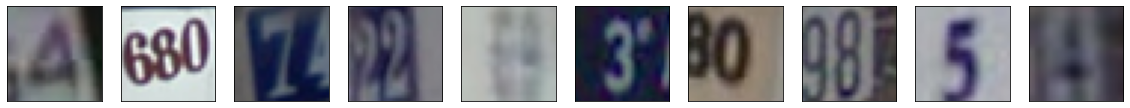

In [19]:
SVHN.display(X)

In [22]:
y[0:10]

[<tf.Tensor: shape=(), dtype=int64, numpy=4>,
 <tf.Tensor: shape=(), dtype=int64, numpy=8>,
 <tf.Tensor: shape=(), dtype=int64, numpy=7>,
 <tf.Tensor: shape=(), dtype=int64, numpy=2>,
 <tf.Tensor: shape=(), dtype=int64, numpy=6>,
 <tf.Tensor: shape=(), dtype=int64, numpy=3>,
 <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 <tf.Tensor: shape=(), dtype=int64, numpy=8>,
 <tf.Tensor: shape=(), dtype=int64, numpy=5>,
 <tf.Tensor: shape=(), dtype=int64, numpy=4>]

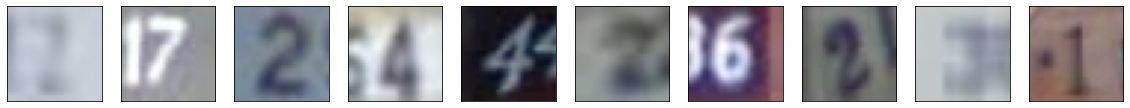

In [20]:
SVHN.display(X_test)

In [23]:
y_test[0:10]

[<tf.Tensor: shape=(), dtype=int64, numpy=2>,
 <tf.Tensor: shape=(), dtype=int64, numpy=7>,
 <tf.Tensor: shape=(), dtype=int64, numpy=2>,
 <tf.Tensor: shape=(), dtype=int64, numpy=4>,
 <tf.Tensor: shape=(), dtype=int64, numpy=4>,
 <tf.Tensor: shape=(), dtype=int64, numpy=2>,
 <tf.Tensor: shape=(), dtype=int64, numpy=6>,
 <tf.Tensor: shape=(), dtype=int64, numpy=2>,
 <tf.Tensor: shape=(), dtype=int64, numpy=3>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>]

*Denoise.*

In [ ]:
from model import ConvDenoiser
importlib.reload(sys.modules['model']) 
from model import ConvDenoiser

In [ ]:
# denoise
X = [item['image'] for item in svhn_sampled]
y = [item['label'] for item in svhn_sampled]

denoiser = ConvDenoiser(X_noisy, X_clean, y_noisy, y_clean)

history, score, predictions = denoiser.model(X_noisy, X_clean, y_noisy, y_clean)

*Get updated score after removing noise.*

In [ ]:
# get updated score post-denoising